# Dylan Forsythe

## Research Interests

Since pursuing a degree in data science, I am constantly being introduced to various ways of observing and exploring data, tables, charts, and graphs. I very much enjoy the visualization of dataframes by turning them into graphs because doing so helps me understand the data. By learning how to customize these graphs, theres an almost unlimited amount of stories that can be created. That is where the spark of my research interests lay. I wish to find the stories in the data that are not apparent without the steps involved with data analysis.
For this project, my interest is in learning about the popularities of some of the the sports over the past 30 years. So far, I'm mostly interested in winter olympic sports like snowboarding because of how 'new' it is relative to the other sports, and figure skating simply because I think its pretty. I am hoping to find information by looking at how the popularity of a sport changes over time. 

## Research Question 1
**How do the popularities of each sport (i.e. amount of participants/competitors) change over time for each sport?**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the base theme for seaborn graphs
sns.set_theme(style='whitegrid',font_scale=1.25)

In [3]:
# Read raw data and save into seperate df's
OlympicResultsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv')
OlympicHostsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv')
OlympicMedalsDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv')
OlympicAthletesDF = pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_athletes.csv')

In [4]:
# Check the shape, and heads of each dataframe to get an idea of what information each one contains
print(OlympicResultsDF.shape)
OlympicResultsDF.head()

(162804, 15)


,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [5]:
print(OlympicHostsDF.shape)
OlympicHostsDF.head()

(53, 7)


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [6]:
print(OlympicMedalsDF.shape)
OlympicMedalsDF.head()

(21697, 12)


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohullah-nikpai,Rohullah NIKPAI,Afghanistan,AF,AFG
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohullah-nikpai,Rohullah NIKPAI,Afghanistan,AF,AFG
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,NaN,https://olympics.com/en/athletes/jan-d-boersma,Jan D. BOERSMA,Netherlands Antilles,AN,AHO
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/taoufik-makhl...,Taoufik MAKHLOUFI,Algeria,DZ,ALG
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/taoufik-makhl...,Taoufik MAKHLOUFI,Algeria,DZ,ALG


In [7]:
print(OlympicAthletesDF.shape)
OlympicAthletesDF.head()

(75904, 7)


,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


## Initial Thoughts
- I am deciding to use the OlympicResultsDF as my main database source because it contains the largest amount of information and has columns for most of the information I will need.  
- I will probably need to pull a few columns from other dataframes to this one

In [8]:
# I want to create a dataframe that contains all the information I would like from the above four dataframes
# Then I should be able to create some visualizations to learn more about what the dataframe contains

Research_df = OlympicResultsDF
Research_df = Research_df.drop(columns=['country_name','country_code','country_3_letter_code',
                                        'athlete_url','rank_equal','rank_position',
                                        'value_unit','value_type'],axis=1)
Research_df = Research_df.rename(columns={'slug_game':'game_slug'})
Research_df

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,athlete_full_name
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",NaN
...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Franciszek BUJAK
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Henryk Mückenbrunn
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Milda Prokopec
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Sigurd Overby


In [9]:
# Since we only want to look at the sports that have athletes listed, I have to drop all of the rows that
# do not contain athlete information

Research_df = Research_df.dropna(subset=['athletes','athlete_full_name'], how='all').reset_index(drop=True)
Research_df

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,athlete_full_name
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",NaN
...,...,...,...,...,...,...,...
149617,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Pio Imboden
149618,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Franciszek BUJAK
149619,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Henryk Mückenbrunn
149620,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Milda Prokopec


In [10]:
Research_df = Research_df.rename(columns= {'discipline_title':'Sport Name',
                                           'event_title':'Event Name',
                                           'participant_type':'Type',
                                           'game_slug':'Location',
                                           'athletes':'Athletes Names',
                                           'athlete_full_name':'Athlete Name',
                                          'medal_type':'Medal'})
Research_df

,Sport Name,Event Name,Location,Type,Medal,Athletes Names,Athlete Name
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",NaN
...,...,...,...,...,...,...,...
149617,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Pio Imboden
149618,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Franciszek BUJAK
149619,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Henryk Mückenbrunn
149620,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,NaN,Milda Prokopec


In [11]:
# Unfinished Research Question 1 dataframe. See Milestone 3 conclusion below for report.

---

# Potential Research Question 2 (if question 1 doesn't pan out)

**How many athletes obtained a medal in their first appearance?**
PLAN:
- drop all na's
- Combine Athletes DF with Results DF and check if the 'first_game' column matches the 'slug_game' column with a medal listed


In [12]:
mergedDF = pd.merge(OlympicResultsDF, OlympicAthletesDF, how='inner')
mergedDF = pd.merge(mergedDF, OlympicMedalsDF, how='inner')
OlympicHostsDF = OlympicHostsDF.rename(columns={'game_slug' : 'slug_game'})
mergedDF = pd.merge(mergedDF, OlympicHostsDF, how='inner')

In [13]:
mergedDF = mergedDF.drop(columns=['athlete_url','value_type','games_participations','participant_type',
                       'athletes','rank_equal','rank_position','country_name','country_code',
                       'country_3_letter_code','athlete_year_birth','bio','athlete_medals','event_gender',
                       'participant_title','game_end_date','game_start_date','game_season','slug_game'])

In [14]:
mergedDF = mergedDF.dropna(subset=['medal_type'])

In [15]:
mergedDF = mergedDF.sort_values('game_year')

In [16]:
mergedDF = mergedDF[mergedDF['first_game'] == mergedDF['game_name']]

In [17]:
mergedDF = mergedDF.rename(columns={'discipline_title' : 'Sport',
                                    'event_title' : 'Sport Category',
                                    'medal_type' : 'Medal Awarded',
                                    'athlete_full_name' : 'Athlete Name',
                                    'value_unit' : 'Event Score',
                                    'first_game' : 'First Game',
                                    'game_location' : 'Game Location',
                                    'game_name' : 'Game Name',
                                    'game_year' : 'Game Year'})

In [18]:
mergedDF = mergedDF.reset_index(drop=True)
mergedDF

,Sport,Sport Category,Medal Awarded,Athlete Name,Event Score,First Game,Game Location,Game Name,Game Year
0,Wrestling,"Unlimited Class, Greco-Roman Men",SILVER,Georgios TSITAS,NaN,Athens 1896,Greece,Athens 1896,1896
1,Athletics,marathon men,BRONZE,Gyula KELLNER,11195000,Athens 1896,Greece,Athens 1896,1896
2,Athletics,1500m men,GOLD,Edwin FLACK,273200,Athens 1896,Greece,Athens 1896,1896
3,Athletics,800m men,GOLD,Edwin FLACK,131000,Athens 1896,Greece,Athens 1896,1896
4,Athletics,1500m men,BRONZE,Albin LERMUSIAUX,at 6-15 metres,Athens 1896,Greece,Athens 1896,1896
...,...,...,...,...,...,...,...,...,...
7938,Short Track Speed Skating,Men's 500m,SILVER,Konstantin IVLIEV,40272,Beijing 2022,China,Beijing 2022,2022
7939,Short Track Speed Skating,Men's 1500m,BRONZE,Semen ELISTRATOV,2:15.094,Beijing 2022,China,Beijing 2022,2022
7940,Short Track Speed Skating,Men's 1000m,SILVER,Wenlong LI,1:23.140,Beijing 2022,China,Beijing 2022,2022
7941,Snowboard,Women's Snowboard Big Air,BRONZE,Kokomo MURASE,72.75,Beijing 2022,China,Beijing 2022,2022


In [19]:
Gold = mergedDF[mergedDF['Medal Awarded'] == 'GOLD']
Silver = mergedDF[mergedDF['Medal Awarded'] == 'SILVER']
Bronze = mergedDF[mergedDF['Medal Awarded'] == 'BRONZE']

In [20]:
Goldticks = Gold['Sport'].unique()

In [21]:
goldPerSport = Gold[['Sport', 'Medal Awarded']].groupby('Sport').count()

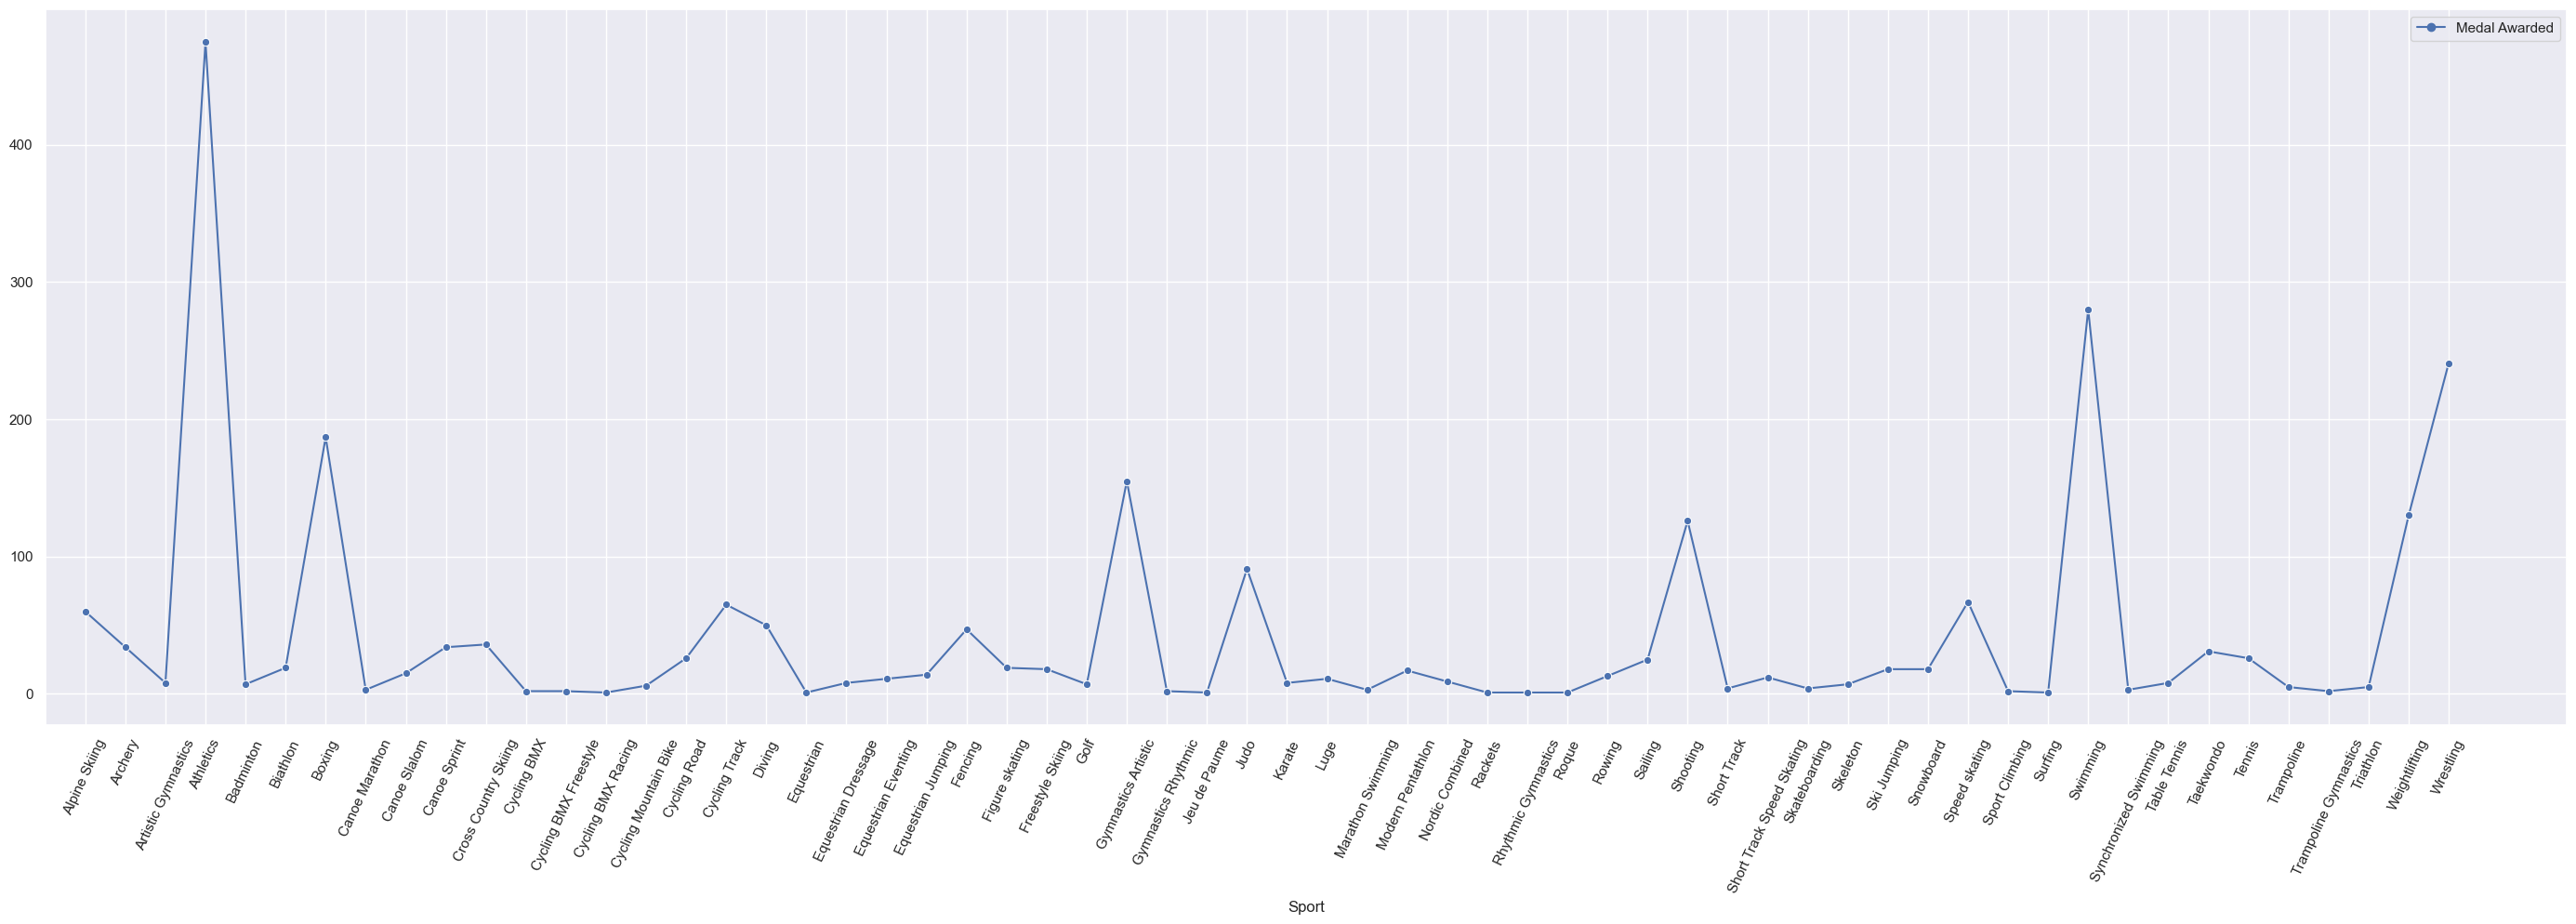

In [22]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(35,10))
sns.lineplot(goldPerSport,markers=True)
sns.despine
plt.xlim(-1)
plt.xticks(Goldticks, rotation=65)
None

*This linegraph plots the amount of gold medals earned by athletes in their first appearance at an Olympic event. This is a total count dating back to the 1890's until 2022. The amounts of Gold medals earned in each sport at its max is less than 500. Therefore, I can deduce that it is highly unlikely for someone new to achieve this feat.*

---

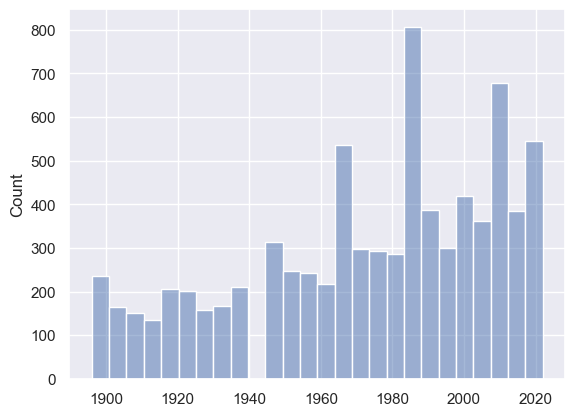

In [23]:
dfplt = sns.histplot(mergedDF, legend=False)

*A notable point on this graph is the lack of data between 1940 and 1945. This is presumably because of World War 2.*

# Milestone 3 EDA Conclusion
I spent a total of about 18 hours working on this milestone. Trying to deal with all the cleaning, wrangling, and attempting to sort out the, what felt like, infinite amount of errors. That being said, my primary research queston (and interest) is giving me some grief because I cannot figure out how to extract the athletes from the 'athletes' column. The original dataframe loads the column in containing strings that look like lists containing tuples. Without being able to seperate those, I don't think I can get an accurate visualization of the popularity of each sport. This leads me to my next issue I was having.

Everything in my Research_DF dataframe is categorical and I could not figure out what I needed to do to get a numerical column in there for my visualizations. I'm wanting to know the total number of participants for each sport, per year that the olympics are held.

Since I could not figure out my research question 1, I moved to my 2nd question and found that merging all the dataframes together and then dropping the NaN's and columns that I did not want proved to be useful. Then by comparing an individuals first appearance with the Olympic games that they won a medal at, if they were the same, then this told me they won a medal the on their first appearance. This value turned out to be only 7943 individuals in the history of the Olympics.

---